REPORT OF DATA MANIPULATION FOR SELECTING FEATURES TO FIT A LINEAR REGRESSION MODEL


EXPLORING DATASET ABOUT FOOTBALL PLAYER OF PREMIERE lEAGUE 17/18 SEASON / 
CONSIDERING MARKET PRICE AS TARGET / 
EXPECTING TO WORK WITH A LINEAR MODEL FOR PREDICTING MARKET VALUE / 
TRYING TO FIND MOST RELEVANT NUMERICAL FEATURES TO FIT A LINEAR MODEL

------------------------------------------------------------------

#CONTENT OF THE FEATURES

name: Name of the player

club: Club of the player

age : Age of the player

position : The usual position on the pitch

position_cat : (#CATEGORICAL FEATURE)

    1 for attackers

    2 for midfielders

    3 for defenders

    4 for goalkeepers

market_value : As on transfermrkt.com on July 20th, 2017 (#TRUSTFUL SOURCE OF THE TARGET)

page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017 (#POPULARITY)

fpl_value : Value in Fantasy Premier League as on July 20th, 2017

fpl_sel : % of FPL players who have selected that player in their team

fpl_points : FPL points accumulated over the previous season

region:

    1 for England

    2 for EU

    3 for Americas

    4 for Rest of World

nationality

new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)

age_cat

club_id

big_club: Whether one of the Top 6 clubs

new_signing: Whether a new signing for 2017/18 (till 20th July) 

--------------------------------------------------------------------


APPROACH:

1 EXPLORE FEATURES

2 FEATURE ENGINNERING AND EDA TO SELECT BEST FEATURES TO FIT A LINEAR MODEL
   
   2.1 SKEW TRANSFORMATION
   
   2.2 THATS A IMPORTANT STEP: CHOOSING THE FEATURES THAT ARE EXPECTED TO BE CORRELATED WITH THE MARKET VALUE (PREFERENCIALLY LINEAR CORRELATED)

#FROM INTUITION LETS EXCLUDE A SET OF NON-RELEVANT FEATURES FOR THE MARKET_VALUE, LIKE: name, club_id, new_foreign, nationality, fpl_sel, club, new_signing and region. Those aren't useful features to fit a linear model regression.

#LETS NOT EXCLUDE THE POSSIBLE OUTLIERS, AS I BELIEVE THEY REPRESENT THE MARKET VARIATIONS.

#MY ANALYSIS CAME UP WITH RELEVANT FEATURES TO BE TESTED FOR CORRELATION: age, big_club (1 for player on the squad of the top 6 teams of england, and 0 for the rest), page_views (popularity), position_cat, fpl_value, fpl_point (fpl measures are trustful).

   2.3 GENERATE VISUALS: generate visuals with pairplot ANS SEABORN to better understand the target and feature-target relationship.
   
   #IMPORTANT NOTES ON 2.3:

1 - EVERY SELECTED FEATURE SEEMS TO BE CORRELATED WITH THE TARGET

2 - THE TARGET SHOWS SOME KIND OF LINEAR CORRELATION WITH fpl_value (A GOOD MEASURE OF PREDICTED PRICE BASED ON SKILLS). BUT, AS fpl_value ALSO PREDICTS THE PRICE BASED ON OTHER SELECTED FEATURES, I DECIDED TO EXCLUDE THIS FEATURE, TO AVOID FALSE CORRELATION, AS THE TENDENCY OF THE VALUES ARE EXPECTED TO DISPLAY THE SAME PATERN (THEY ARE DIFFERENT MODELS PREDICTING THE SAME TARGET), BUT, OF COURSE, I HOPE TO SELECT MY OWN FEATURES FOR BETTER UNDERSTANDING OF MY OWN MODEL.

3 - THE TARGET (market_value) DISPLAY SOME CURVED RELATION WITH fpl_points (GOOD MEASURE OF SKILLS) AND page_views (POPULARITY) - SO, THOSE FEATURES HAVE TO BE ENGINEERED ("This suggests that we should add quadratic polynomial terms or transformations for those features, allowing us to express that non-linear relationship while still using linear regression as our model")

4 - THE OTHER FEATURES: position_cat, age_cat AND big_club ARE CATEGORICAL FEATURES (IMPORTANT FEATURES) ALREADY ENCODED. THEY DISPLAYED A LOT OF INFORMATION, LIKE THE RELATION OF THE MEAN PRICE OF PLAYER AND THE CATEGORY OF AGE (WHEN PLOTTING age_cat ON X WE CAN SEE A GAUSSIAN CURVE AROUND THE MIDDLE VALUES OF CATEGORYS) - THATS THE SAME RELATION DISPLAYED IN THE age FEATURE.

5 - TO AVOID FEATURES MEASURING THE SAME OBSERVATION, LETS EXCLUDE age_cat AND STAY WITH THE NUMERICAL age.
   
   2.4 ADDING POLYNOMIAL FEATURES and EXCLUDE possible wrong correlations.
   
   2.5 Creating new feature: AS THE AGE CATEGORY HAS A INVERSE IMPACT ON FINAL PRICE OF PLAYER (PLAYER WITH MOST TIME OF CARRER TO GO AND MORE TENDENCY TO IMPROVE ARE age_cat =  1 and 2, COMPARED WITH age_cat=3, 4, 5 or 6, HAVE MORE MARKET APPEAL, AND PRICE CAN INCREASE BEACUSE OF THE SPECULATION)

SO, LET'S CALL THIS NEW FEATURE speculation.
THIS NEW FEATURE REPRESENT THE INVERSE RELATION OF THE PRICE AND AGE (PART BECAUSE OF SPECULATION), AND CONSIDER THE ALREADY ACHIEVED AMOUNT OF SKILLS OF THE PLAYER fpl_point (TO EXCLUDE POOR PLAYERS, AND INCLUDE OLD PLAYER WITH GREAT SKILLS).

THE NEW FEATURE speculation, WILL BE = fpl_points/age.

   
   2.6 Incorporating categorical features to fit linear regression models
INCORPORATE THE CATEGORICAL FEATURES IN THE MODEL BY HOT-ENCODING METHOD


---------------------------------------------------------------------------------


ALL DONE! NOW WE HAVE JUST NUMERICAL FEATURES (WITH THE CATEGORICAL ONES BEEING ENCODED), AND THE CORRELATIONS BETWEEN THEN AND THE TARGET WERE CONSIDERED.

I BELIEVE THESE ARE GOOD FEATURES, ALREADY TUNED TO FIT A LINEAR REGRESSION MODEL TO PREDICT THE MARKET VALUE OF FOOTBALL PLAYERS IN PREMIERE LEAGUE (USING THE PLAYERS OF PREMIERE LEAGUE SEASON 17/18 AS OBSERVATONS).


*these notes are also included before the respective code.
    
 
    


In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [7]:
filepath = "data/epldata_final.csv"
data = pd.read_csv(filepath)
data.head()
data.tail()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,0.10%,12,4.0,Senegal,0,3,20,0,0


In [8]:
print("Number of PLAYERS in the data:", data.shape[0])
print("Number of FEATURES in the data:", data.shape[1])

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)

Number of PLAYERS in the data: 461
Number of FEATURES in the data: 17
['name', 'club', 'age', 'position', 'position_cat', 'market_value', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region', 'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club', 'new_signing']
name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object


#EXPLORING NUMERICAL FEATURES

In [9]:
data.info() #EXPLORING NUMERICAL FEATURES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [10]:
data.select_dtypes('number').columns

Index(['age', 'position_cat', 'market_value', 'page_views', 'fpl_value',
       'fpl_points', 'region', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

#EXPLORING CATEGORICAL FEATURES

In [11]:
data.position_cat.value_counts() #ALREADY ENCODED

1    154
3    153
2    112
4     42
Name: position_cat, dtype: int64

#POSITION CATEGORY:
1 - DEFENSE
2 - MIDFIELD
3 - ATACK
4 - GOALKEEPER

In [12]:
data.region.value_counts() #IRRELEVANT FOR MARKET VALUE PREDICTIONS

2.0    207
1.0    156
4.0     56
3.0     41
Name: region, dtype: int64

#REGION CATEGORY: 1 for England, 2 for EU, 3 ]for Americas and 4 for Rest of World
#ALREADY ENCODED

In [13]:
data.age_cat.value_counts()

3    150
4    126
2     76
1     50
5     32
6     27
Name: age_cat, dtype: int64

#AGE CATEGORY: INTERVALS
#ALREADY ENCODED

#FEATURE ENGINEERING AND EDA

In [14]:
# Create a list of NUMERICAL FEATURES to check for skewing
# SKEWING THE NUMERICAL FEATURES 
# FEATURES ABOVE THE skew_limit WILL BE LOG TRANSFORMED

num_cols=data.select_dtypes('number').columns
num_cols

skew_limit = 0.75
skew_num=data[num_cols].skew()
skew_num

age             0.135533
position_cat    0.182976
market_value    2.162548
page_views      3.244946
fpl_value       2.136684
fpl_points      0.825879
region          0.850083
new_foreign     5.100749
age_cat         0.172058
club_id         0.015017
big_club        0.856601
new_signing     2.019198
dtype: float64

In [17]:
# Showing the skewed columns
skew_cols = (skew_num
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
new_foreign,5.100749
page_views,3.244946
market_value,2.162548
fpl_value,2.136684
new_signing,2.019198
big_club,0.856601
region,0.850083
fpl_points,0.825879


In [18]:
#PERFORMING THE SKEW TRANSFORMATION EXCLUDING THE MARKET PRICE (TARGET), WITH THE LOG1P TRANSFORMATION

for col in skew_cols.index.values:
    if col == "market_value":
        continue
    data[col] = data[col].apply(np.log1p)

In [19]:
#CHECKING FOR MISSING VALUES

data.isnull().sum().sort_values()

name            0
club_id         0
age_cat         0
new_foreign     0
nationality     0
fpl_points      0
big_club        0
fpl_sel         0
page_views      0
market_value    0
position_cat    0
position        0
age             0
club            0
fpl_value       0
new_signing     0
region          1
dtype: int64

#THATS A IMPORTANT STEP: CHOOSING THE FEATURES THAT ARE EXPECTED TO BE CORRELATED WITH THE MARKET VALUE (PREFERENCIALLY LINEAR CORRELATED)

#FROM INTUITION LETS EXCLUDE A SET OF NON-RELEVANT FEATURES FOR THE MARKET_VALUE, LIKE: name, club_id, new_foreign, nationality, fpl_sel, club, new_signing and region. Those aren't useful features to fit a linear model regression.

#LETS NOT EXCLUDE THE POSSIBLE OUTLIERS, AS I BELIEVE THEY REPRESENT THE MARKET VARIATIONS.

#MY ANALYSIS CAME UP WITH RELEVANT FEATURES TO BE TESTED FOR CORRELATION: age, big_club (1 for player on the squad of the top 6 teams of england, and 0 for the rest), page_views (popularity), position_cat, fpl_value, fpl_point (fpl measures are trustful).


In [36]:
smaller_data= data.loc[:,['age', 'age_cat', 'big_club', 'page_views', 
                      'position_cat', 'fpl_value', 'fpl_points', 'market_value']]

In [37]:
#EXPLORING THE NEW SET OF FEATURES
smaller_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,461.0,26.804772,3.961892,17.000000,24.000000,27.000000,30.000000,38.000000
age_cat,461.0,3.206074,1.279795,1.000000,2.000000,3.000000,4.000000,6.000000
big_club,461.0,0.210500,0.319090,0.000000,0.000000,0.000000,0.693147,0.693147
page_views,461.0,6.112570,1.059562,1.386294,5.398163,6.133398,6.799056,8.944420
position_cat,461.0,2.180043,1.000061,1.000000,1.000000,2.000000,3.000000,4.000000
fpl_value,461.0,1.845947,0.180560,1.609438,1.704748,1.791759,1.871802,2.602690
fpl_points,461.0,3.114295,1.853218,0.000000,1.791759,3.951244,4.553877,5.579730
market_value,461.0,11.012039,12.257403,0.050000,3.000000,7.000000,15.000000,75.000000


In [22]:
#position_cat and age_cat are already categorized, as we can see on 25%, 50%, 75% info

In [23]:
#age_cat: 6 intervals of the aproximated life-time of a professional player

In [24]:
#position_cat: 4 different categories

In [38]:
smaller_data.info() #checking for missing features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           461 non-null    int64  
 1   age_cat       461 non-null    int64  
 2   big_club      461 non-null    float64
 3   page_views    461 non-null    float64
 4   position_cat  461 non-null    int64  
 5   fpl_value     461 non-null    float64
 6   fpl_points    461 non-null    float64
 7   market_value  461 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 28.9 KB


#IMPORTANT STEP:  generate visuals with pairplot to better understand the target and feature-target relationship

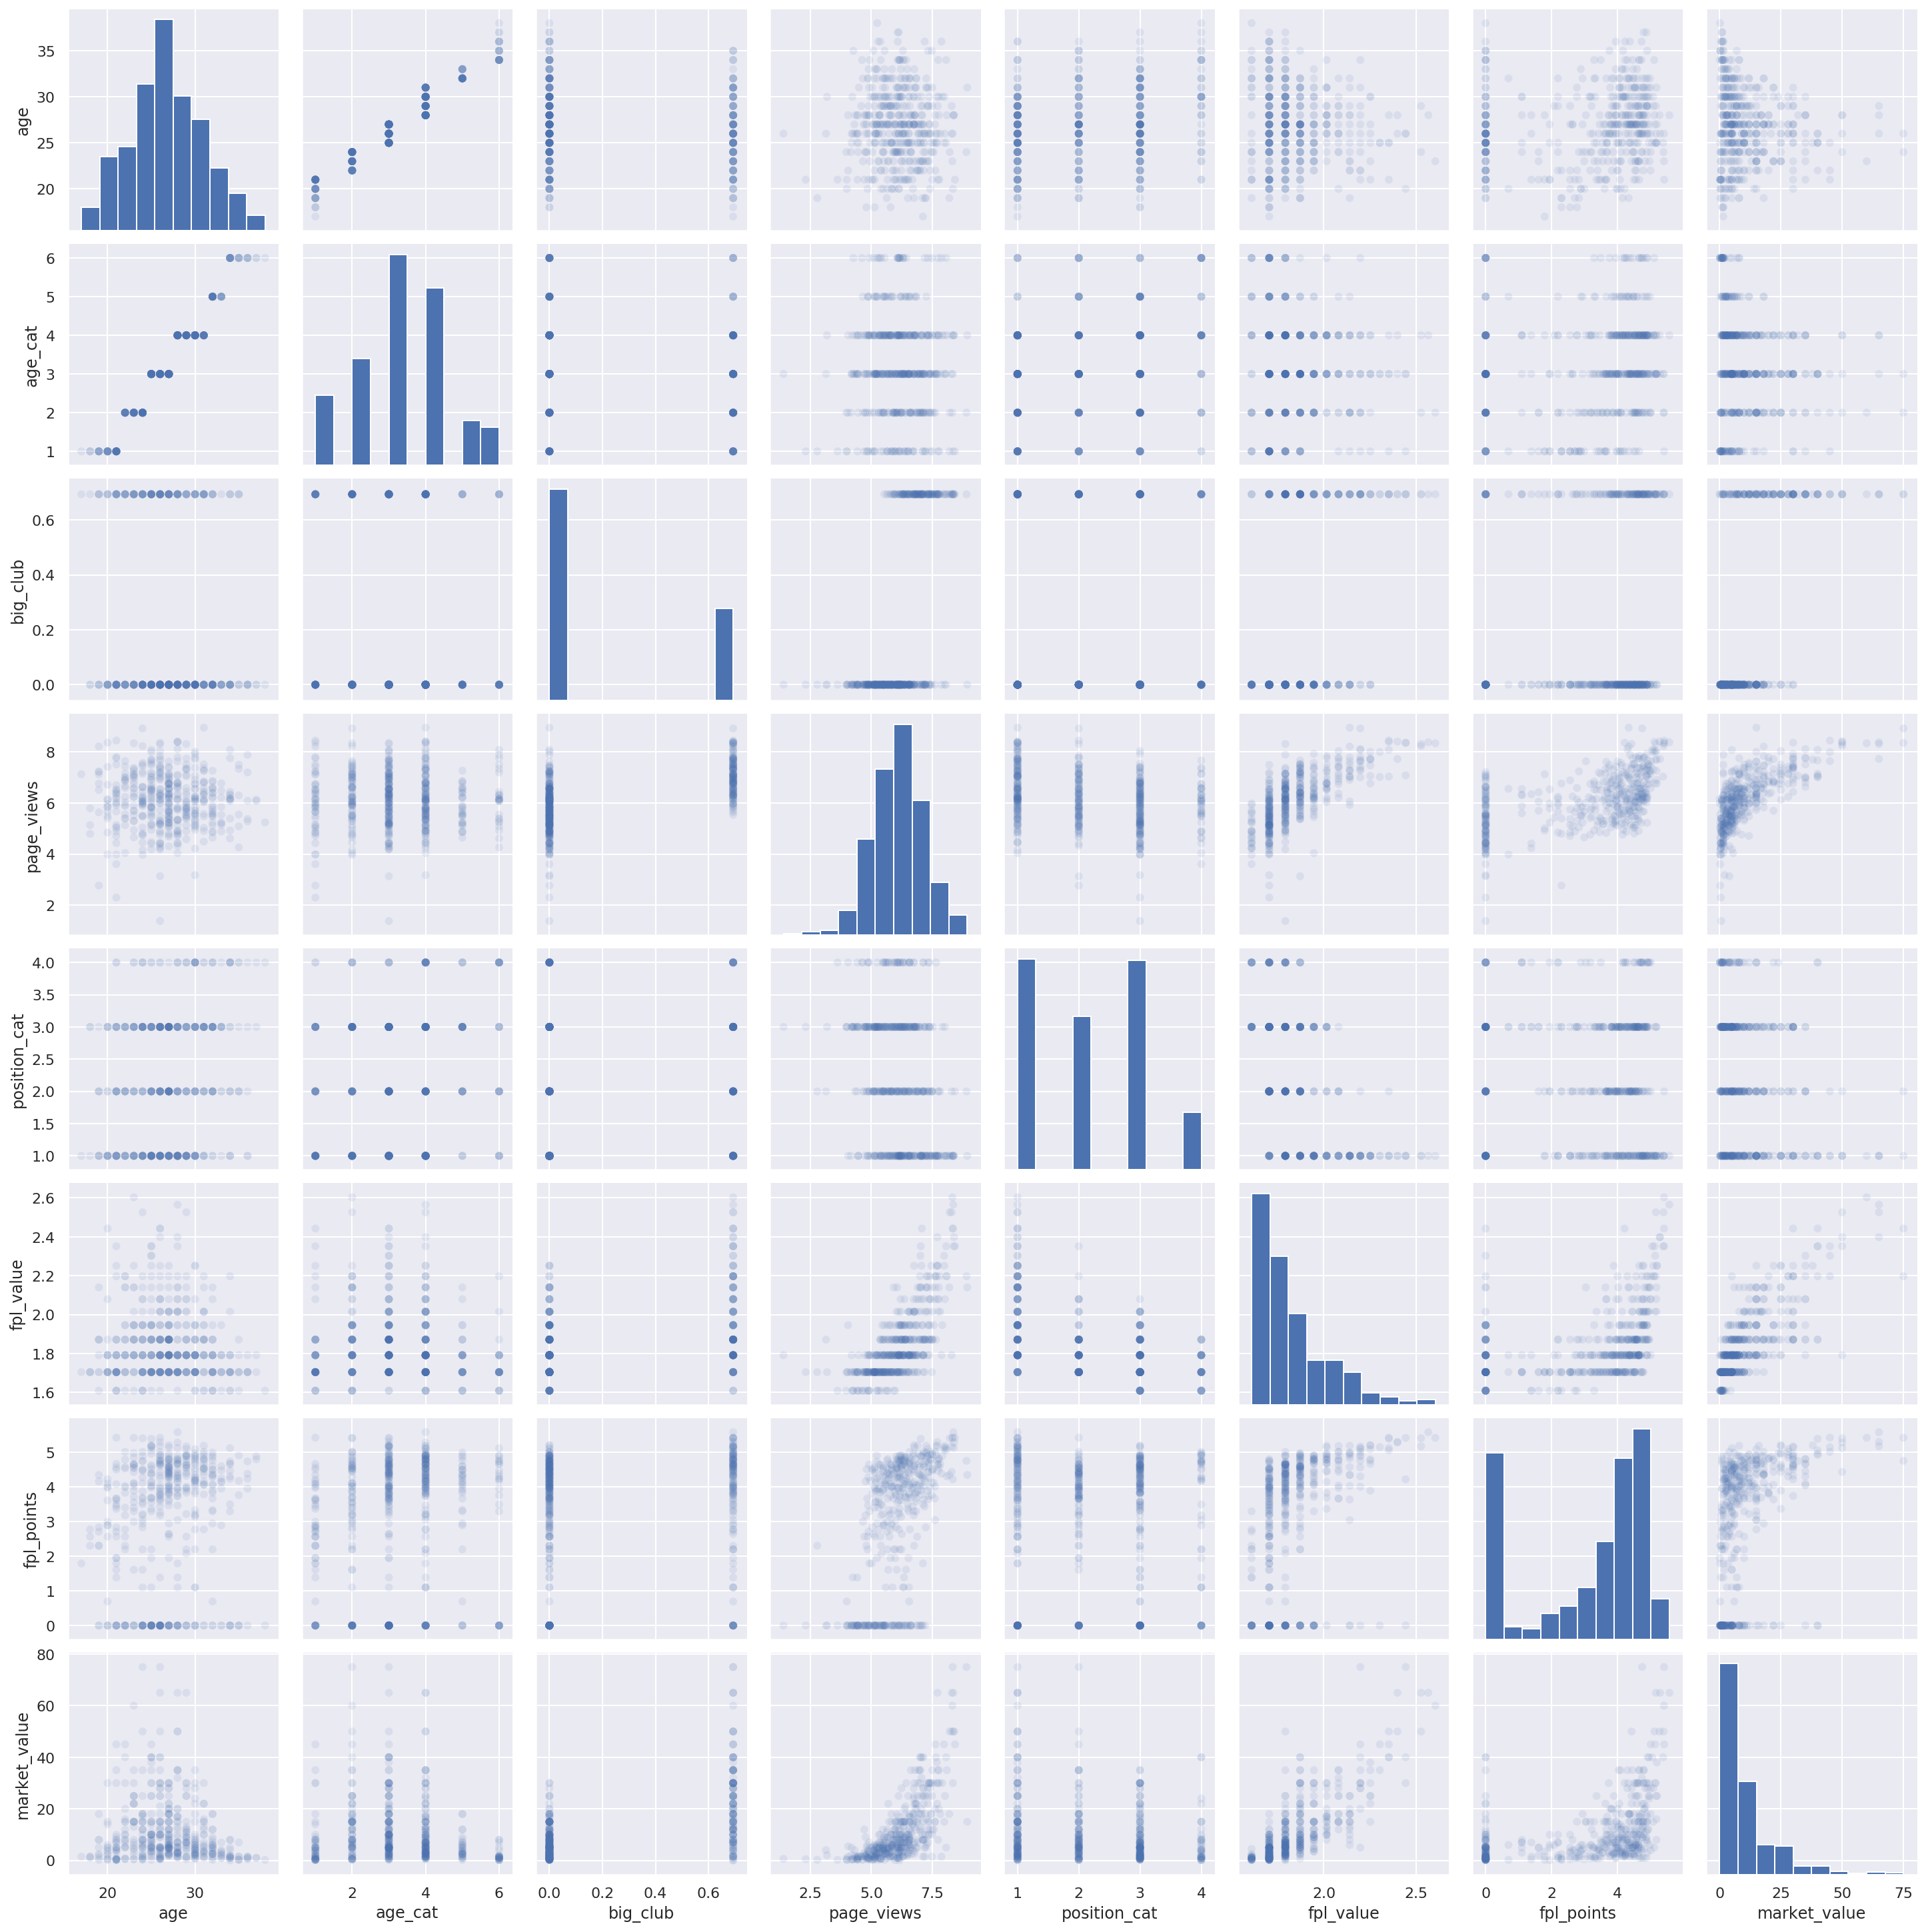

In [39]:
sns.pairplot(smaller_data, plot_kws=dict(alpha=.1, edgecolor='none'))

#IMPORTANT NOTES:

1 - EVERY SELECTED FEATURE SEEMS TO BE CORRELATED WITH THE TARGET

2 - THE TARGET SHOWS SOME KIND OF LINEAR CORRELATION WITH fpl_value (A GOOD MEASURE OF PREDICTED PRICE BASED ON SKILLS). BUT, AS fpl_value ALSO PREDICTS THE PRICE BASED ON OTHER SELECTED FEATURES, I DECIDED TO EXCLUDE THIS FEATURE, TO AVOID FALSE CORRELATION, AS THE TENDENCY OF THE VALUES ARE EXPECTED TO DISPLAY THE SAME PATERN (THEY ARE DIFFERENT MODELS PREDICTING THE SAME TARGET), BUT, OF COURSE, I HOPE TO SELECT MY OWN FEATURES FOR BETTER UNDERSTANDING OF MY OWN MODEL.

3 - THE TARGET (market_value) DISPLAY SOME CURVED RELATION WITH fpl_points (GOOD MEASURE OF SKILLS) AND page_views (POPULARITY) - SO, THOSE FEATURES HAVE TO BE ENGINEERED ("This suggests that we should add quadratic polynomial terms or transformations for those features, allowing us to express that non-linear relationship while still using linear regression as our model")

4 - THE OTHER FEATURES: position_cat, age_cat AND big_club ARE CATEGORICAL FEATURES (IMPORTANT FEATURES) ALREADY ENCODED. THEY DISPLAYED A LOT OF INFORMATION, LIKE THE RELATION OF THE MEAN PRICE OF PLAYER AND THE CATEGORY OF AGE (WHEN PLOTTING age_cat ON X WE CAN SEE A GAUSSIAN CURVE AROUND THE MIDDLE VALUES OF CATEGORYS) - THATS THE SAME RELATION DISPLAYED IN THE age FEATURE.

5 - TO AVOID FEATURES MEASURING THE SAME OBSERVATION, LETS EXCLUDE age_cat AND STAY WITH THE NUMERICAL age.

In [29]:
#EXCLUDING fpl_value

In [82]:
sd=smaller_data.copy()
sd.drop(['fpl_value','age_cat'],axis=1,inplace=True)
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           461 non-null    int64  
 1   big_club      461 non-null    float64
 2   page_views    461 non-null    float64
 3   position_cat  461 non-null    int64  
 4   fpl_points    461 non-null    float64
 5   market_value  461 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 21.7 KB


In [83]:
#ADDING POLYNOMIAL FEATURES

In [84]:
sd['SQfpl_points'] = sd['fpl_points'] ** 2
sd['SQpage_views'] = sd['page_views'] ** 2

In [85]:
sd

,age,big_club,page_views,position_cat,fpl_points,market_value,SQfpl_points,SQpage_views
0,28,0.693147,8.373323,1,5.579730,65.0,31.133385,70.112535
1,28,0.693147,8.388450,1,5.123964,50.0,26.255007,70.366099
2,35,0.693147,7.333023,4,4.905275,7.0,24.061721,53.773227
3,28,0.693147,7.780721,1,4.812184,20.0,23.157118,60.539618
4,31,0.693147,6.816736,3,4.804021,22.0,23.078618,46.467888
...,...,...,...,...,...,...,...,...
456,21,0.000000,5.666427,2,3.663562,5.0,13.421684,32.108391
457,23,0.000000,5.298317,3,3.555348,7.0,12.640500,28.072167
458,23,0.000000,5.293305,3,3.401197,4.5,11.568144,28.019076
459,21,0.000000,6.023448,1,2.833213,1.0,8.027098,36.281921


In [86]:
#ADDING NEW FEATURE

#AS THE AGE CATEGORY HAS A INVERSE IMPACT ON FINAL PRICE OF PLAYER 
(PLAYER WITH MOST TIME OF CARRER TO GO AND MORE TENDENCY TO IMPROVE ARE age_cat =  1 and 2, COMPARED WITH age_cat=3, 4, 5 or 6, HAVE MORE MARKET APPEAL, AND PRICE CAN INCREASE BEACUSE OF THE SPECULATION)

#SO, LET'S CALL THIS NEW FEATURE speculation.
THIS NEW FEATURE REPRESENT THE INVERSE RELATION OF THE PRICE AND AGE (PART BECAUSE OF SPECULATION), AND CONSIDER THE ALREADY ACHIEVED AMOUNT OF SKILLS OF THE PLAYER fpl_point (TO EXCLUDE POOR PLAYERS, AND INCLUDE OLD PLAYER WITH GREAT SKILLS).

THE NEW FEATURE speculation, WILL BE = fpl_points/age.

In [87]:
sd['speculation'] = sd['fpl_points']/sd['age']
sd

,age,big_club,page_views,position_cat,fpl_points,market_value,SQfpl_points,SQpage_views,speculation
0,28,0.693147,8.373323,1,5.579730,65.0,31.133385,70.112535,0.199276
1,28,0.693147,8.388450,1,5.123964,50.0,26.255007,70.366099,0.182999
2,35,0.693147,7.333023,4,4.905275,7.0,24.061721,53.773227,0.140151
3,28,0.693147,7.780721,1,4.812184,20.0,23.157118,60.539618,0.171864
4,31,0.693147,6.816736,3,4.804021,22.0,23.078618,46.467888,0.154968
...,...,...,...,...,...,...,...,...,...
456,21,0.000000,5.666427,2,3.663562,5.0,13.421684,32.108391,0.174455
457,23,0.000000,5.298317,3,3.555348,7.0,12.640500,28.072167,0.154580
458,23,0.000000,5.293305,3,3.401197,4.5,11.568144,28.019076,0.147878
459,21,0.000000,6.023448,1,2.833213,1.0,8.027098,36.281921,0.134915


#Incorporating categorical features into linear regression models
LETS INCORPORATE THE CATEGORICAL FEATURES IN THE MODEL BY HOT-ENCODING THEN

In [88]:
sd['big_club'].value_counts()

0.000000    321
0.693147    140
Name: big_club, dtype: int64

In [89]:
sd['position_cat'].value_counts()

1    154
3    153
2    112
4     42
Name: position_cat, dtype: int64

In [90]:
sd['big_club'] = pd.get_dummies(sd['big_club'], drop_first=True)


In [91]:
sd

,age,big_club,page_views,position_cat,fpl_points,market_value,SQfpl_points,SQpage_views,speculation
0,28,1,8.373323,1,5.579730,65.0,31.133385,70.112535,0.199276
1,28,1,8.388450,1,5.123964,50.0,26.255007,70.366099,0.182999
2,35,1,7.333023,4,4.905275,7.0,24.061721,53.773227,0.140151
3,28,1,7.780721,1,4.812184,20.0,23.157118,60.539618,0.171864
4,31,1,6.816736,3,4.804021,22.0,23.078618,46.467888,0.154968
...,...,...,...,...,...,...,...,...,...
456,21,0,5.666427,2,3.663562,5.0,13.421684,32.108391,0.174455
457,23,0,5.298317,3,3.555348,7.0,12.640500,28.072167,0.154580
458,23,0,5.293305,3,3.401197,4.5,11.568144,28.019076,0.147878
459,21,0,6.023448,1,2.833213,1.0,8.027098,36.281921,0.134915


In [92]:
position_cat = ['position_cat']
sd = pd.get_dummies(sd, columns=position_cat, drop_first=True)

In [93]:
sd

,age,big_club,page_views,fpl_points,market_value,SQfpl_points,SQpage_views,speculation,position_cat_2,position_cat_3,position_cat_4
0,28,1,8.373323,5.579730,65.0,31.133385,70.112535,0.199276,0,0,0
1,28,1,8.388450,5.123964,50.0,26.255007,70.366099,0.182999,0,0,0
2,35,1,7.333023,4.905275,7.0,24.061721,53.773227,0.140151,0,0,1
3,28,1,7.780721,4.812184,20.0,23.157118,60.539618,0.171864,0,0,0
4,31,1,6.816736,4.804021,22.0,23.078618,46.467888,0.154968,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
456,21,0,5.666427,3.663562,5.0,13.421684,32.108391,0.174455,1,0,0
457,23,0,5.298317,3.555348,7.0,12.640500,28.072167,0.154580,0,1,0
458,23,0,5.293305,3.401197,4.5,11.568144,28.019076,0.147878,0,1,0
459,21,0,6.023448,2.833213,1.0,8.027098,36.281921,0.134915,0,0,0


#FOR SOME UNKNOW REASON, THE get_dummies METHOD EXCLUDED THE position_cat=1.

#LETS FIX IT WITH SOME CODE TO INCLUDE THE ATTACKING CATEGORY

In [113]:
sd['position_cat_1']=smaller_data['position_cat']
sd

,age,big_club,page_views,fpl_points,market_value,SQfpl_points,SQpage_views,speculation,position_cat_2,position_cat_3,position_cat_4,position_cat_1
0,28,1,8.373323,5.579730,65.0,31.133385,70.112535,0.199276,0,0,0,1
1,28,1,8.388450,5.123964,50.0,26.255007,70.366099,0.182999,0,0,0,1
2,35,1,7.333023,4.905275,7.0,24.061721,53.773227,0.140151,0,0,1,4
3,28,1,7.780721,4.812184,20.0,23.157118,60.539618,0.171864,0,0,0,1
4,31,1,6.816736,4.804021,22.0,23.078618,46.467888,0.154968,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
456,21,0,5.666427,3.663562,5.0,13.421684,32.108391,0.174455,1,0,0,2
457,23,0,5.298317,3.555348,7.0,12.640500,28.072167,0.154580,0,1,0,3
458,23,0,5.293305,3.401197,4.5,11.568144,28.019076,0.147878,0,1,0,3
459,21,0,6.023448,2.833213,1.0,8.027098,36.281921,0.134915,0,0,0,1


In [114]:

sd['position_cat_1']=sd.position_cat_1.replace([2,3,4], 0)
sd


,age,big_club,page_views,fpl_points,market_value,SQfpl_points,SQpage_views,speculation,position_cat_2,position_cat_3,position_cat_4,position_cat_1
0,28,1,8.373323,5.579730,65.0,31.133385,70.112535,0.199276,0,0,0,1
1,28,1,8.388450,5.123964,50.0,26.255007,70.366099,0.182999,0,0,0,1
2,35,1,7.333023,4.905275,7.0,24.061721,53.773227,0.140151,0,0,1,0
3,28,1,7.780721,4.812184,20.0,23.157118,60.539618,0.171864,0,0,0,1
4,31,1,6.816736,4.804021,22.0,23.078618,46.467888,0.154968,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
456,21,0,5.666427,3.663562,5.0,13.421684,32.108391,0.174455,1,0,0,0
457,23,0,5.298317,3.555348,7.0,12.640500,28.072167,0.154580,0,1,0,0
458,23,0,5.293305,3.401197,4.5,11.568144,28.019076,0.147878,0,1,0,0
459,21,0,6.023448,2.833213,1.0,8.027098,36.281921,0.134915,0,0,0,1


,age,big_club,page_views,fpl_points,market_value,SQfpl_points,SQpage_views,speculation,position_cat_2,position_cat_3,position_cat_4,position_cat_1
0,28,1,8.373323,5.579730,65.0,31.133385,70.112535,0.199276,0,0,0,1
1,28,1,8.388450,5.123964,50.0,26.255007,70.366099,0.182999,0,0,0,1
2,35,1,7.333023,4.905275,7.0,24.061721,53.773227,0.140151,0,0,1,0
3,28,1,7.780721,4.812184,20.0,23.157118,60.539618,0.171864,0,0,0,1
4,31,1,6.816736,4.804021,22.0,23.078618,46.467888,0.154968,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
456,21,0,5.666427,3.663562,5.0,13.421684,32.108391,0.174455,1,0,0,0
457,23,0,5.298317,3.555348,7.0,12.640500,28.072167,0.154580,0,1,0,0
458,23,0,5.293305,3.401197,4.5,11.568144,28.019076,0.147878,0,1,0,0
459,21,0,6.023448,2.833213,1.0,8.027098,36.281921,0.134915,0,0,0,1


ALL DONE! NOW WE HAVE JUST NUMERICAL FEATURES (WITH THE CATEGORICAL ONES BEEING ENCODED), AND THE CORRELATIONS BETWEEN THEN AND THE TARGET WERE CONSIDERED.

I BELIEVE THESE ARE GOOD FEATURES, ALREADY TUNED TO FIT A LINEAR REGRESSION MODEL TO PREDICT THE MARKET VALUE OF FOOTBALL PLAYERS IN PREMIERE LEAGUE (USING THE PLAYERS OF PREMIERE LEAGUE SEASON 17/18 AS OBSERVATONS).